In [26]:
import xarray as xr

In [31]:
ds=xr.open_dataset('/public3/hhups_sr/hh_SevConvec/20241114070000/hhups_sr_d01_2024-11-15_05_00_00')

In [32]:
ds

<xarray.Dataset> Size: 346MB
Dimensions:    (Time: 10, south_north: 750, west_east: 824)
Coordinates:
    XLAT       (Time, south_north, west_east) float32 25MB ...
    XLONG      (Time, south_north, west_east) float32 25MB ...
Dimensions without coordinates: Time, south_north, west_east
Data variables: (12/13)
    Times      (Time) |S19 190B ...
    T2         (Time, south_north, west_east) float32 25MB ...
    U10        (Time, south_north, west_east) float32 25MB ...
    V10        (Time, south_north, west_east) float32 25MB ...
    HGT        (Time, south_north, west_east) float32 25MB ...
    RAINC      (Time, south_north, west_east) float32 25MB ...
    ...         ...
    RAINNC     (Time, south_north, west_east) float32 25MB ...
    GRAUPELNC  (Time, south_north, west_east) float32 25MB ...
    HAILNC     (Time, south_north, west_east) float32 25MB ...
    WSPD10MAX  (Time, south_north, west_east) float32 25MB ...
    REFD_COM   (Time, south_north, west_east) float32 25MB ...
    LANDMASK   (Time, south_north, west_east) float32 25MB ...
Attributes: (12/85)
    TITLE:                            OUTPUT FROM WRF V4.2.1 MODEL
    START_DATE:                      2024-11-14_07:00:00
    WEST-EAST_GRID_DIMENSION:        825
    SOUTH-NORTH_GRID_DIMENSION:      751
    BOTTOM-TOP_GRID_DIMENSION:       75
    DX:                              3000.0
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [37]:
#%
import numpy as np
import re,os
from glob import glob
import datetime
from netCDF4 import Dataset
from wrf import (get_cartopy, latlon_coords, to_np, cartopy_xlim, cartopy_ylim,
                 getvar, ALL_TIMES)
from scipy.interpolate import griddata
from glob import glob
import pandas as pd
import xarray as xr
from config.config import wrf_extent,sd_solar_prefix,sd_solar_outprefix
#from src.aux import extract_tar_gz,delete_folder_contents
import metpy.calc as calc
import metpy.units as units
from tqdm import tqdm

In [39]:
dsa=Dataset('/public3/hhups_sr/hh_SevConvec/20241114070000/hhups_sr_d01_2024-11-15_05_00_00')
#U10
# SDOWN=getvar(ds,'SWDNB',timeidx=ALL_TIMES).data

In [44]:
getvar(dsa,'T2',timeidx=ALL_TIMES)

<xarray.DataArray 'T2' (Time: 10, south_north: 750, west_east: 824)> Size: 25MB
array([[[291.95776, 291.5845 , 292.39163, ..., 300.1471 , 300.1438 ,
         300.13968],
        [290.5905 , 290.27957, 291.68832, ..., 300.12878, 300.12433,
         300.12555],
        [288.5202 , 288.306  , 290.1646 , ..., 300.11612, 300.109  ,
         300.1099 ],
        ...,
        [262.00644, 261.27237, 260.65845, ..., 273.9202 , 274.6539 ,
         274.96805],
        [260.98312, 261.20883, 260.36984, ..., 273.66272, 274.50134,
         274.50174],
        [259.77274, 260.92328, 260.50543, ..., 274.37436, 274.8268 ,
         274.7707 ]],

       [[292.51123, 292.1105 , 292.88327, ..., 300.13583, 300.1344 ,
         300.13284],
        [291.12305, 290.7623 , 292.1254 , ..., 300.11673, 300.11734,
         300.11813],
        [289.03   , 288.74176, 290.5093 , ..., 300.1013 , 300.09836,
         300.10217],
...
        [262.88123, 262.08252, 261.4241 , ..., 273.71863, 274.396  ,
         274.68546],
        [261.81894, 261.99643, 261.1237 , ..., 273.4949 , 274.24896,
         274.26126],
        [260.5776 , 261.69717, 261.23065, ..., 274.1563 , 274.52957,
         274.46945]],

       [[292.94205, 292.53717, 293.31363, ..., 300.15286, 300.1496 ,
         300.13812],
        [291.55817, 291.897  , 292.61862, ..., 300.13635, 300.1327 ,
         300.13516],
        [289.4878 , 289.2998 , 291.04785, ..., 300.12552, 300.12042,
         300.123  ],
        ...,
        [262.88037, 262.0803 , 261.42426, ..., 273.69736, 274.36795,
         274.66287],
        [261.81802, 261.99518, 261.12326, ..., 273.466  , 274.221  ,
         274.24164],
        [260.57672, 261.6961 , 261.22937, ..., 274.1372 , 274.50937,
         274.44913]]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 2MB 104.6 104.6 ... 133.2 133.2
    XLAT     (south_north, west_east) float32 2MB 26.31 26.32 ... 46.51 46.51
  * Time     (Time) datetime64[ns] 80B 2024-11-15T05:00:00 ... 2024-11-15T05:...
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    units:        K
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=117.0, moad_cen_lat=37.250003814...

In [46]:
getvar(dsa,'WSPD10MAX')

<xarray.DataArray 'WSPD10MAX' (south_north: 750, west_east: 824)> Size: 2MB
array([[3.689429  , 3.3166025 , 3.0250044 , ..., 5.37542   , 5.306566  ,
        5.1955113 ],
       [3.909752  , 3.4844446 , 3.5240645 , ..., 5.3224792 , 5.2434483 ,
        5.123887  ],
       [4.4530506 , 4.331102  , 4.0871043 , ..., 5.2494187 , 5.2695165 ,
        5.1745143 ],
       ...,
       [1.2016343 , 0.6941079 , 0.7174422 , ..., 4.825744  , 4.2443757 ,
        4.590986  ],
       [1.1915084 , 0.8368396 , 0.62782574, ..., 4.8965187 , 4.2838826 ,
        4.617947  ],
       [1.1502125 , 0.94291294, 0.49717543, ..., 4.88545   , 4.5184364 ,
        4.622783  ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 2MB 104.6 104.6 ... 133.2 133.2
    XLAT     (south_north, west_east) float32 2MB 26.31 26.32 ... 46.51 46.51
    Time     datetime64[ns] 8B 2024-11-15T05:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  WIND SPD MAX 10 M
    units:        m s-1
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=117.0, moad_cen_lat=37.250003814...

In [33]:
ds1=xr.open_dataset('/public4/dataset_yl/forecastpower/sd_region/wind/sd_wrf_wind_20241114040000.nc')

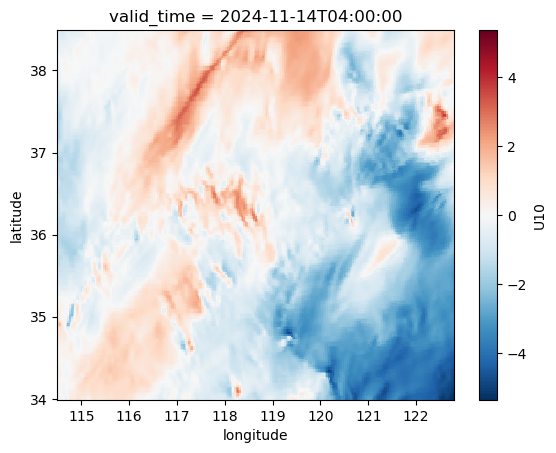

In [36]:
ds1['U10'][0].plot()

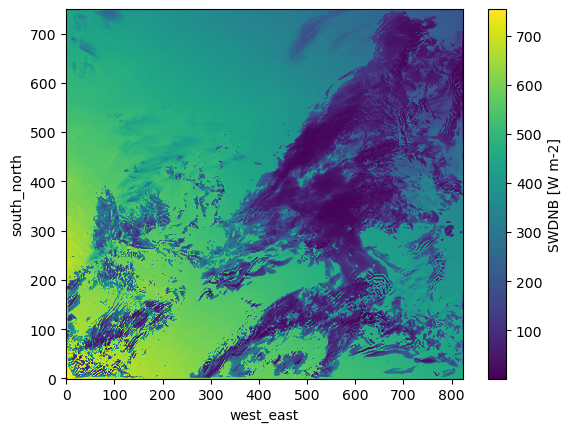

In [10]:
ds['SWDNB'][0].plot()

In [1]:
#%
import numpy as np
import re,os
from glob import glob
import datetime
from netCDF4 import Dataset
from wrf import (get_cartopy, latlon_coords, to_np, cartopy_xlim, cartopy_ylim,
                 getvar, ALL_TIMES)
from scipy.interpolate import griddata
from glob import glob
import pandas as pd
import xarray as xr
from config.config import wrf_extent,sd_solar_prefix,sd_solar_outprefix
#from src.aux import extract_tar_gz,delete_folder_contents
import metpy.calc as calc
import metpy.units as units
from tqdm import tqdm

In [2]:
file='/public3/hhups_sr/hh_solar/20241113120000/SOLAR_d01_2024-11-14_06:00:00'

In [5]:
pattern = r'\d{4}-\d{2}-\d{2}_\d{2}:\d{2}:\d{2}'
time_str=re.findall(pattern,file)[0]
file_time=datetime.datetime.strptime(re.findall(pattern,file)[0],'%Y-%m-%d_%H:%M:%S')

In [6]:
file_time

datetime.datetime(2024, 11, 14, 6, 0)

In [10]:
#%
import numpy as np
import re,os
from glob import glob
import datetime
from netCDF4 import Dataset
from wrf import (get_cartopy, latlon_coords, to_np, cartopy_xlim, cartopy_ylim,
                 getvar, ALL_TIMES)
from scipy.interpolate import griddata
from glob import glob
import pandas as pd
import xarray as xr
from config.config import wrf_extent,sd_solar_prefix,sd_solar_outprefix
#from src.aux import extract_tar_gz,delete_folder_contents
import metpy.calc as calc
import metpy.units as units
from tqdm import tqdm

def convert_xr(file):
    try:
        pattern = r'\d{4}-\d{2}-\d{2}_\d{2}:\d{2}:\d{2}'
        time_str=re.findall(pattern,file)[0]
        file_time=datetime.datetime.strptime(re.findall(pattern,file)[0],'%Y-%m-%d_%H:%M:%S')

    except:
        print('报错转移')
        pattern = r'\d{4}-\d{2}-\d{2}_\d{2}:\d{2}:\d{2}'
        time_str=re.findall(pattern,file)[0]
        file_time=datetime.datetime.strptime(re.findall(pattern,file)[0],'%Y-%m-%d_%H:%M:%S')

  
    ok_time=pd.to_datetime(file_time)
    lon,lat,data_var=read_file(file)
    xr_ds=grid_data(lon,lat,data_var,ok_time)
    return xr_ds
#%%
def read_file(ncfile:str):
    '''
    读取单个的nc文件
    江苏省范围,全天候
    '''
    ds=Dataset(ncfile)
    #U10
    SDOWN=getvar(ds,'SWDNB',timeidx=ALL_TIMES).data
    #print(getvar(ds,'U10',timeidx=ALL_TIMES).data.shape)
    #print(U10.shape)
    #V10
    #V10=getvar(ds,'V10',timeidx=ALL_TIMES).data[0,:,:]
    

    XLAT=getvar(ds,'XLAT',timeidx=ALL_TIMES).data
    XLONG=getvar(ds,'XLONG',timeidx=ALL_TIMES).data
    #print(XLAT.shape)
    wl=np.where((XLONG>=wrf_extent[0]-0.1)&(XLONG<=wrf_extent[1]+0.1)&
                      (XLAT>=wrf_extent[2]-0.1)&(XLAT<=wrf_extent[3]+0.1))
    


    lon_line=XLONG[wl]
    lat_line=XLAT[wl]
    

    #U10
    SDOWN_line=SDOWN[wl]
    
    #V10
    #V10_line=V10[wl]
    print('step1')
    item_dict=dict()

    item_dict['SDOWN']=SDOWN_line

    
    
    #关闭文件
    ds.close()
    
    return lon_line,lat_line,item_dict

def grid_data(lon_line,lat_line,data_var,time):
    lat=np.arange(wrf_extent[2],wrf_extent[3],0.02)
    lon=np.arange(wrf_extent[0],wrf_extent[1],0.02)
    gridlon,gridlat=np.meshgrid(lon,lat)
    
    SDOWN=griddata((lon_line,lat_line),data_var['SDOWN'],(gridlon,gridlat),method='nearest',fill_value=-9999) #12
    #V10=griddata((lon_line,lat_line),data_var['V10'],(gridlon,gridlat),method='nearest',fill_value=-9999) #12
    

    
    SDOWN_da=xr.DataArray(SDOWN, coords={'lat': lat, 'lon': lon}, dims=('lat', 'lon')) 
    
    #V10_da=xr.DataArray(V10, coords={'lat': lat, 'lon': lon}, dims=('lat', 'lon')) 
    
    

    #将xarray.DataArray对象组合成一个xarray.Dataset对象，并指定变量名
    data_vars = {
        'SDOWN':SDOWN_da,
    }
    
    
    ds = xr.Dataset(data_vars)
    fillvalue=-9999
    #为每个变量设置编码属性，指定填充值
    for var_name in ds.variables:
        ds[var_name].encoding['_FillValue'] = fillvalue
    #为数据集添加时间维度和坐标
    ds['time'] = xr.DataArray([time], dims=['time'])
    ds.encoding['_FillValue'] = -9999 
    # 打印 Dataset 的信息
    return ds



def sort_files_by_time(file_list):
    # 导入os模块，用于获取文件的修改时间
    import os
    # 使用sorted函数对文件列表进行排序，使用lambda表达式作为排序的关键字
    # lambda表达式的作用是从文件名中提取出时间部分，并转换为datetime对象，以便比较
    # 例如，从'/nas/Datasets/WRF-RLDAS/henan/forecast-start12h/2023081812/wrfout_d02_2023-08-20_12:30:00'中提取出'2023-08-20_12:30:00'
    # 并使用datetime.strptime函数将其转换为datetime对象
    # datetime模块是Python内置的日期和时间处理模块
    from datetime import datetime
    try:
        sorted_file_list =file_list #sorted(file_list, key=lambda f: datetime.strptime(f[-19:], '%Y-%m-%d_%H:%M:%S'))
    except:
        print('报错转移')
        sorted_file_list = file_list # sorted(file_list, key=lambda f: datetime.strptime(f[-19:], '%Y-%m-%d_%H_%M_%S'))
    # 返回排序后的文件列表
    return sorted_file_list

def process_file(ifile):
    try:
        ds = convert_xr(ifile)
        print(os.path.basename(ifile))
        return ds
    except Exception as e:
        print(f'The error is {e}')
        return None

import concurrent.futures

def extract_one_day(forecast_time:datetime.datetime):
    '''
    执行提取一天的WRF辐照度数据.
    '''
    
    time_str=forecast_time.strftime('%Y%m%d%H0000')
    #print(time_str)
    input_files=glob(sd_solar_prefix+'/'+time_str+'/SOLAR_d01_*')
    print(sd_solar_prefix+'/'+time_str)
    
    if len(input_files)>0:
        
        # if time_str=='20231119120000':
        #     return 0
        files=sort_files_by_time(input_files)
        #print(files)
        out_prefix=sd_solar_outprefix
        # if not os.path.exists(out_prefix):
        #     os.mkdir(out_prefix)
        
        
        #out_time_str=forecast_time.strftime('%Y%m%d%H')
        outfilename='sd_wrf_solar_'+time_str+'.nc'
        outfile=os.path.join(out_prefix,outfilename)
        
        if os.path.exists(outfile):
            print(f'the out file is exists !!! >>>>> {outfile}')
        else:
            try:
                files=sorted(files)
                xr_list=[]
                # with concurrent.futures.ThreadPoolExecutor(2) as executor:
                #     # 并行处理文件
                #     results = list(executor.map(process_file, files))
                results=[process_file(file) for file in files]
                # 将所有有效的数据合并
                xr_list = [result for result in results if result is not None]
                ds_all = xr.concat(xr_list, dim='time')

                # 按照时间维度排序
                ds_all = ds_all.sortby('time')

                ds_all.to_netcdf(outfile)
                print(outfile+' is finish!!!')
            #delete_folder_contents(wrf_release_prefix_temp)
            #return files
            except Exception as e:
                print('程序出错')
                print(e)
    else:
        print('no file is find!!!')

In [11]:
times=datetime.datetime(2024,11,14,6)

In [12]:
extract_one_day(times)

/public3/hhups_sr/hh_solar/20241114060000
step1
SOLAR_d01_2024-11-14_06:00:00
step1
SOLAR_d01_2024-11-14_07:00:00
step1
SOLAR_d01_2024-11-14_08:00:00
step1
SOLAR_d01_2024-11-14_09:00:00
step1
SOLAR_d01_2024-11-14_10:00:00
step1
SOLAR_d01_2024-11-14_11:00:00
step1
SOLAR_d01_2024-11-14_12:00:00
step1
SOLAR_d01_2024-11-14_13:00:00
step1
SOLAR_d01_2024-11-14_14:00:00
step1
SOLAR_d01_2024-11-14_15:00:00
step1
SOLAR_d01_2024-11-14_16:00:00
step1
SOLAR_d01_2024-11-14_17:00:00
step1
SOLAR_d01_2024-11-14_18:00:00
step1
SOLAR_d01_2024-11-14_19:00:00
step1
SOLAR_d01_2024-11-14_20:00:00
step1
SOLAR_d01_2024-11-14_21:00:00
step1
SOLAR_d01_2024-11-14_22:00:00
step1
SOLAR_d01_2024-11-14_23:00:00
step1
SOLAR_d01_2024-11-15_00:00:00
step1
SOLAR_d01_2024-11-15_01:00:00
step1
SOLAR_d01_2024-11-15_02:00:00
step1
SOLAR_d01_2024-11-15_03:00:00
step1
SOLAR_d01_2024-11-15_04:00:00
step1
SOLAR_d01_2024-11-15_05:00:00
step1
SOLAR_d01_2024-11-15_06:00:00
/public4/dataset_yl/forecastpower/sd_region/solar/sd_wrf_s

In [13]:
ds1=xr.open_dataset('/public4/dataset_yl/forecastpower/sd_region/solar/sd_wrf_solar_20241114060000.nc')

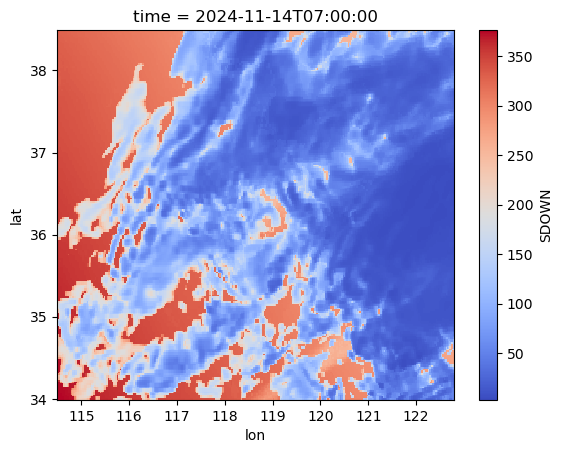

In [25]:
ds1['SDOWN'][1].plot(cmap='coolwarm')

In [47]:
xr.open_dataset('/public4/dataset_yl/forecastpower/sd_region/solar/sd_wrf_solar_20241114040000.nc')

<xarray.Dataset> Size: 19MB
Dimensions:     (valid_time: 25, latitude: 225, longitude: 415)
Coordinates:
  * latitude    (latitude) float64 2kB 34.0 34.02 34.04 ... 38.44 38.46 38.48
  * longitude   (longitude) float64 3kB 114.5 114.5 114.5 ... 122.7 122.8 122.8
  * valid_time  (valid_time) datetime64[ns] 200B 2024-11-14T04:00:00 ... 2024...
Data variables:
    SDOWN       (valid_time, latitude, longitude) float64 19MB ...